In [30]:
# Arnold 猫变换

import cv2
import numpy as np

import matplotlib.pyplot as plt


In [31]:
def matrix_power_mod(matrix: np.ndarray, power: int, mod: np.ndarray):
	result = np.eye(matrix.shape[0], dtype=np.int64)
	for _ in range(power):
		result = np.matmul(result, matrix) % mod
	return result

def arnold(img, n):
	img = np.array(img)
	h, w, c = img.shape
	new_img = np.zeros((h, w, c), dtype=np.uint8)
	matrix = np.array([[2, 1], [1, 1]])
	N_matrix = matrix_power_mod(matrix, n, np.array([h, w]))
	print(N_matrix)
	N_matrix = N_matrix % np.array([h, w])
	for x in range(h):
		for y in range(w):
			new_x, new_y = np.dot(N_matrix, np.array([x, y])) % np.array([h, w])
			new_img[new_x, new_y] = img[x, y]
	return new_img

def get_arnold_reverse(L):
	_matrix = np.array([[2, 1], [1, 1]])
	matrix = _matrix.copy()
	cnt = 1
	while matrix[0, 0] != 1 or matrix[0, 1] != 0 or matrix[1, 0] != 0 or matrix[1, 1] != 1:
		matrix = np.matmul(matrix, _matrix) % np.array([L, L])
		cnt += 1
	return cnt

def arnold_reverse(img, n):
	nn = get_arnold_reverse(img.shape[0])
	reversed_img = arnold(img, nn - n)
	return reversed_img

[[473 439]
 [439  34]]
[[ 34  73]
 [ 73 473]]


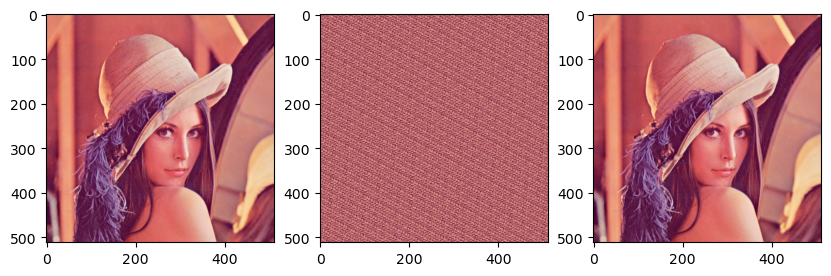

In [32]:
img_bgr = cv2.imread('LenaRGB.bmp', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

new_img = arnold(img_rgb, 101) # 101 是一个质数，具有更好的打散效果
reversed_img = arnold_reverse(new_img, 101)

plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(img_rgb)
plt.subplot(132)
plt.imshow(new_img)
plt.subplot(133)
plt.imshow(reversed_img)
plt.show()
